<a href="https://colab.research.google.com/github/lazarevic23/PPPOFaceDetection/blob/main/Face_Detection_Marijana_Lazarevic_IT10_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***FACE DETECTION APLICATION***

#Uvod

U narednim primerima ćemo videti primenu tehnika mašinskog učenja kao i dubokog učenja za rešavanje određenih problema obrade fotografija, u ovom primeru ćemo se pozabaviti detekcijom lica.

Prvi deo rada je detaljnije upoznavanje sa odabranim tehinkama. Započećemo sa problemom prepoznavanja lica, odnosno detekcija lica za koje je mreža trenirana, zatim ću koristiti model dubokog učenja za rešavanje određenih problema, kako bi mreža bila sposobna da na slici sa više lica detektuje samo ona za koje je trenirana. 

Drugi deo rada je obada fotografija iz dataseta.

- Data set sadrži foldere sa oko 50 isečenih (kropovanih) lica svakog Avengers-a.

    1.Chris Evans (**Captain America**)

    2.Chris Hemsworth (**Thor**)

    3.Mark Ruffalo (**Hulk**)

    4.Robert DowneyJr (**The Iron man**)

    5.Scarlett Johansson (**Black Widow**)

Na samom kraju ću dati neki svoj zaključak kao i iskustvo rada na ovom projektu.

# **Face Detection**

Detekcija lica je zadatak obrade fotografije koji pokušava da identifikuje i verifikuje osobu na osnovu fotografije njenog lica. Sistem za prepoznavanje lica je tehnologija sposobna da upari ljudsko lice sa digitalne slike ili video okvira sa bazom podataka lica, koja se obično koristi za autentifikaciju korisnika putem usluga verifikacije ličnih podataka, radi precizno određivanjem i merenjem crta lica sa date slike.

Danas je detekcija lica prvi i nezobilazni korak u brojnim oblastima, kao što su prepoznavanje lica,video nadzor, prepoznavanje izraza lica, interfejs između čoveka i računara, automatizacija formiranja baza podataka lica, i mnogim drugim.

Detekcija lica uglavnom podrazumeva lokalizaciju lica na slici i određivanje njegovih granica.Primene su brojne i to u najrazličitijim oblastima. Automatizacija detekcije lica na velikom broju slika se koristi za formiranje baza podataka lica, koje svoju primenu najčešće nalaze u raznim istraživanjima. Detekcija lica je uglavnom prvi i nezaobilazni korak u procesu prepoznavanja lica, koje se često svodi na upoređivanje detektovanog lica sa postojećim
licima u bazi, odnosno određivanje njihove međusobne sličnosti.

Savremeni digitalni fotoaparati koriste detekciju lica za potrebe automatskog fokusiranja. Pojedine društvene mreže kao i programi za organizovanje kolekcija fotografija imaju mogućnost obeležavanja lica na fotografijama koje korisnik kasnije može da poveže sa pojedinim osobama. Lice koje je jednom označeno kao određena osoba se dalje može koristiti za prepoznavanje ostalih, neoznačenih lica. Detekcija lica se, u
kombinaciji sa prepoznavanjem gestikulacije, koristi i u interfejsima između čoveka i računara.

Postoji veliki broj algoritama za detekciju lica, ali se svi mogu podeliti u četiri kategorije: 

1. Algoritmi zasnovani na znanju,
2. Algoritmi zasnovani na nepromenljivim karakteristikama lica,
3. Algoritmi koji koriste poklapanje šablona i
4. Algoritmi zasnovani na izgledu.

Učitavanje dataseta potrebnog za izvršavanje zadatka.

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw" -O images.zip && rm -rf /tmp/cookies.txt

--2021-08-30 00:42:25--  https://docs.google.com/uc?export=download&confirm=D2TV&id=1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw
Resolving docs.google.com (docs.google.com)... 142.251.6.102, 142.251.6.100, 142.251.6.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.6.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-7g-docs.googleusercontent.com/docs/securesc/1n68jf5hhkvg3jjulo7cngk985l0521m/gj8na4uddiokbuf35pea5povmk7emiu9/1630284075000/06049624160957438625/02383071215908303385Z/1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw?e=download [following]
--2021-08-30 00:42:26--  https://doc-0s-7g-docs.googleusercontent.com/docs/securesc/1n68jf5hhkvg3jjulo7cngk985l0521m/gj8na4uddiokbuf35pea5povmk7emiu9/1630284075000/06049624160957438625/02383071215908303385Z/1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw?e=download
Resolving doc-0s-7g-docs.googleusercontent.com (doc-0s-7g-docs.googleusercontent.com)... 142.251.6.132, 2607:f8b0:4001:c5a::84
Connecting to d

Unzip dataseta

In [ ]:
!unzip images.zip

Archive:  images.zip
  inflating: cropped_images/chris_evans/chris_evans1.png  
  inflating: cropped_images/chris_evans/chris_evans10.png  
  inflating: cropped_images/chris_evans/chris_evans11.png  
  inflating: cropped_images/chris_evans/chris_evans12.png  
  inflating: cropped_images/chris_evans/chris_evans13.png  
  inflating: cropped_images/chris_evans/chris_evans14.png  
  inflating: cropped_images/chris_evans/chris_evans15.png  
  inflating: cropped_images/chris_evans/chris_evans16.png  
  inflating: cropped_images/chris_evans/chris_evans17.png  
  inflating: cropped_images/chris_evans/chris_evans18.png  
  inflating: cropped_images/chris_evans/chris_evans19.png  
  inflating: cropped_images/chris_evans/chris_evans2.png  
  inflating: cropped_images/chris_evans/chris_evans20.png  
  inflating: cropped_images/chris_evans/chris_evans21.png  
  inflating: cropped_images/chris_evans/chris_evans22.png  
  inflating: cropped_images/chris_evans/chris_evans23.png  
  inflating: cropped_

Učitavanje modela potrebnog za izvršavanje zadataka.

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1BkBAq7frYX3as0OC58NNF8iIQFaFs6Qw' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1BkBAq7frYX3as0OC58NNF8iIQFaFs6Qw" -O models.zip && rm -rf /tmp/cookies.txt

--2021-08-30 00:42:36--  https://docs.google.com/uc?export=download&confirm=63qq&id=1BkBAq7frYX3as0OC58NNF8iIQFaFs6Qw
Resolving docs.google.com (docs.google.com)... 172.217.214.138, 172.217.214.100, 172.217.214.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-3k-docs.googleusercontent.com/docs/securesc/8b7vtn5jatm309jbk57lek7p9p9uvvc9/jaep7ctqidpml1oridlbp6qgkhpjpj08/1630284150000/07050430151874469418/05547562389855587471Z/1BkBAq7frYX3as0OC58NNF8iIQFaFs6Qw?e=download [following]
--2021-08-30 00:42:36--  https://doc-04-3k-docs.googleusercontent.com/docs/securesc/8b7vtn5jatm309jbk57lek7p9p9uvvc9/jaep7ctqidpml1oridlbp6qgkhpjpj08/1630284150000/07050430151874469418/05547562389855587471Z/1BkBAq7frYX3as0OC58NNF8iIQFaFs6Qw?e=download
Resolving doc-04-3k-docs.googleusercontent.com (doc-04-3k-docs.googleusercontent.com)... 142.251.6.132, 2607:f8b0:4001:c5a::84
Connect

Unzip modela

In [ ]:
!unzip models.zip

Archive:  models.zip
   creating: models/
   creating: models/face_detect/
  inflating: models/face_detect/haarcascade_eye.xml  
  inflating: models/face_detect/haarcascade_frontalface_alt2.xml  
  inflating: models/face_detect/haarcascade_smile.xml  
  inflating: models/face_detect/opencv_face_detector.pbtxt  
  inflating: models/face_detect/opencv_face_detector_uint8.pb  
   creating: models/faster_rcnn/
  inflating: models/faster_rcnn/frozen_inference_graph.pb  
  inflating: models/faster_rcnn/image_info_test2017.json  
   creating: models/mask_rcnn/
  inflating: models/mask_rcnn/colors.txt  
  inflating: models/mask_rcnn/frozen_inference_graph.pb  
  inflating: models/mask_rcnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt  
  inflating: models/mask_rcnn/mscoco_labels.names  
   creating: models/text_detect/
  inflating: models/text_detect/frozen_east_text_detection.pb  
   creating: models/yolov3/
  inflating: models/yolov3/coco_classes.txt  
  inflating: models/yolov3/yolov3.cfg  

## **Face Recognition libary**

Ova Python biblioteka duboko u sebi koristi dlib - savremeni C ++ alatni paket koji sadrži nekoliko algoritama za mašinsko učenje koji pomažu u pisanju sofisticiranih aplikacija zasnovanih na C ++.
Ona stvarajući vektore karakteristika od lica zna kako da ih razlikuje.
Vrši prepoznavanje lica sa tačnošću od 99,38%, što znači da ima bolje performanse ljudski mozak što je neverovatno.

Biblioteka face_recognition u Python-u može da izvrši veliki broj zadataka:

1.   Pronalazak svih lica na datoj slici
2.   Pronalazak i manipulacija crtama lica na slici
3.   Identifikacija lica na slikama
4.   Prepoznavanje lica u realnom vremenu

U ovom slučaju će se rimenjivati treći način upotrebe, odnosno identifikacija lica na slikama.

Obzirom na to da `face_recognition` zahteva dva foldera sa fotografijama (od kojih jedan sa poznatim fotografijama i drugi sa fotografijama za detekciju), napravila sam ih direktno u projektu.

In [ ]:
# Instaliranje alata koji omogućava prepoznavanje lica na slikama
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 9.0 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=94276fd2f3186fa75cfd0815782b9384f8424f19b062c5ca5430d4fe1daac517
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
# Učitavanje slika sa poznatim licima
!mkdir known
!wget https://quotepark.com/media/authors/scarlett-johansson.jpeg -O known/scarlett.jpg
!wget https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg -O known/elon.jpg
!wget https://static01.nyt.com/images/2021/05/17/business/14altGates-print/merlin_183135423_1167fa8a-7940-427e-b690-68876010d286-videoSixteenByNineJumbo1600.jpg -O known/bill.jpg
!wget https://www.biography.com/.image/t_share/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg -O known/obama.jpg

mkdir: cannot create directory ‘known’: File exists
--2021-08-30 00:44:58--  https://quotepark.com/media/authors/scarlett-johansson.jpeg
Resolving quotepark.com (quotepark.com)... 104.21.10.24, 172.67.162.35, 2606:4700:3031::6815:a18, ...
Connecting to quotepark.com (quotepark.com)|104.21.10.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1709834 (1.6M) [image/jpeg]
Saving to: ‘known/scarlett.jpg’

known/scarlett.jpg  100%[===================>]   1.63M  --.-KB/s    in 0.07s   

2021-08-30 00:44:58 (24.7 MB/s) - ‘known/scarlett.jpg’ saved [1709834/1709834]

--2021-08-30 00:44:58--  https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg
Resolving www.biography.com (www.biography.com)... 151.101.194.98, 151.101.66.98, 151.101.2.98, ...
Connecting to www.biography.com (www.biography.com)|151.101.194.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151791 (148K) [image/jpeg]
Saving to: ‘known/elo

In [ ]:
# Ucitavanje slika sa nepoznatim licima
!mkdir unknown
!wget https://cdn-japantimes.com/wp-content/uploads/2021/08/np_file_104940.jpeg -O unknown/5.jpg
!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg
!wget https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg -O unknown/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg


mkdir: cannot create directory ‘unknown’: File exists
--2021-08-30 00:45:12--  https://cdn-japantimes.com/wp-content/uploads/2021/08/np_file_104940.jpeg
Resolving cdn-japantimes.com (cdn-japantimes.com)... 104.26.1.202, 104.26.0.202, 172.67.69.89, ...
Connecting to cdn-japantimes.com (cdn-japantimes.com)|104.26.1.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109293 (107K) [image/jpeg]
Saving to: ‘unknown/5.jpg’

unknown/5.jpg       100%[===================>] 106.73K  --.-KB/s    in 0.03s   

2021-08-30 00:45:12 (3.93 MB/s) - ‘unknown/5.jpg’ saved [109293/109293]

--2021-08-30 00:45:12--  https://i.insider.com/5ddfa893fd9db26b8a4a2df7
Resolving i.insider.com (i.insider.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to i.insider.com (i.insider.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2324104 (2.2M) [image/png]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================

## OpenCV

OpenCV je najpopularnija biblioteka za kompijuter vision. Prvobitno napisan na C / C ++, sada pruža veze za Python.

OpenCV koristi algoritme mašinskog učenja za traženje lica unutar slike. Budući da su lica toliko komplikovana, ne postoji jedan jednostavan test koji će vam reći da li je lice pronađeno ili ne. Umesto toga, postoje hiljade malih obrazaca i karakteristika koje moraju da se podudaraju. Algoritmi razdvajaju zadatak prepoznavanja lica na hiljade manjih zadataka veličine zalogaja, od kojih je svaki lako rešiv. Ovi zadaci se nazivaju i klasifikatorima.

OpenCV kaskada razlaže problem otkrivanja lica u više faza. Za svaki blok radi vrlo grub i brz test. Ako to prođe, uradiće malo detaljniji test itd. Algoritam može imati 30 do 50 ovih faza ili kaskada, a lice će otkriti samo ako sve faze prođu.

Prednost je u tome što će većina slika negativnih vrednosti dati u prvih nekoliko faza, što znači da algoritam neće gubiti vreme testirajući svih 6.000 karakteristika na njemu. Umesto satima, otkrivanje lica sada se može obaviti u realnom vremenu.

## OS

OS modul u Python-u koji pruža funkcije za interakciju sa operativnim sistemom. OS dolazi pod Python-ovim standardnim uslužnim modulima. Ovaj modul pruža prenosni način korišćenja funkcionalnosti zavisne od operativnog sistema. Moduli * os * i * os.path * uključuju mnoge funkcije za interakciju sa sistemom datoteka.

Processing 1.jpg


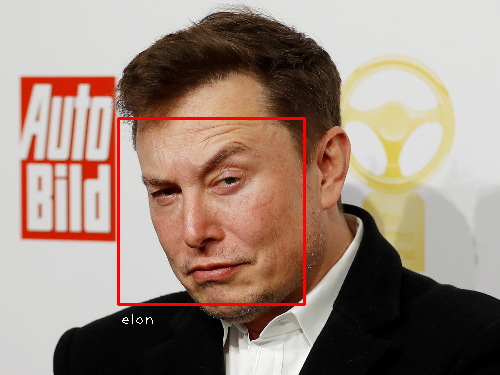

Processing 4.jpg


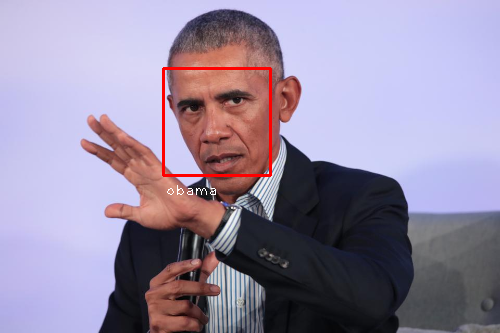

Processing 2.jpg
Processing 5.jpg


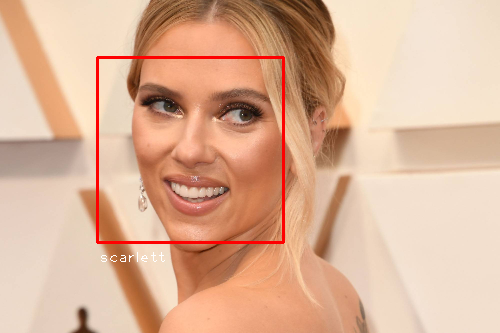

Processing 3.jpg


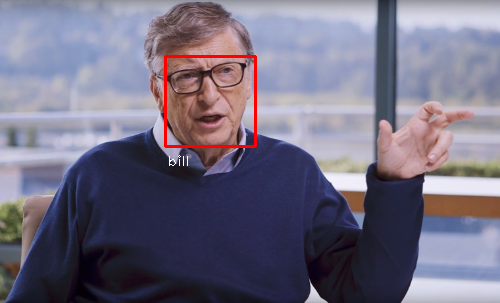

In [ ]:
#Učitavanje potrebnih biblioteka
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

# Ovo je primer učenja mreže koja će detektovati lica koja je naučila 
# kao i neprepoznavati lica koja ne zna

#Funkcija za iščitavanje i smanjivanje veličine fotografija
def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

#Iščitavaju se, analiziraju se sva lica na fotografijama iz foldera sa pozatim fotorafijama i čuvaju se njihove karakteristike i nazivi.

known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

# Lice koje mreza nije naučena neće izlistavati
unknown_dir = 'unknown'

#Iščitavaju se sve fotografije iz foldera sa nepoznatim fotografijama, analiziraju se i uporedjuju se sa poznatim fotografijama i upisuju u rezultate.
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

# Za svako pronadjeno lice iscrtavaju se granice i ispisuje ime (ime predstavlja naziv poznate fotografije sa kojom se lice poklapa).
# Nakon toga se fotografije prikazuju.
    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            cv2_imshow(img)
            

    # Prikazivanje rezultujućih fotografija

## Primer prepoznavanje više lica na fotografiji

In [ ]:
!wget https://www.incimages.com/uploaded_files/image/1920x1080/getty_869035584_390187.jpg -O known/biden.jpg

--2021-08-30 00:45:59--  https://www.incimages.com/uploaded_files/image/1920x1080/getty_869035584_390187.jpg
Resolving www.incimages.com (www.incimages.com)... 151.101.2.59, 151.101.66.59, 151.101.130.59, ...
Connecting to www.incimages.com (www.incimages.com)|151.101.2.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124773 (122K) [image/jpeg]
Saving to: ‘known/biden.jpg’

known/biden.jpg     100%[===================>] 121.85K  --.-KB/s    in 0.02s   

2021-08-30 00:45:59 (5.79 MB/s) - ‘known/biden.jpg’ saved [124773/124773]



In [ ]:
#učitavanje slike na kojoj je više lica
!wget https://media.npr.org/assets/img/2016/06/06/gettyimages-83361265_wide-5bc463f249bd1659318a5c67b48bbecbed88a220-s1600-c85.webp -O known/obama2.jpg

--2021-08-30 00:46:04--  https://media.npr.org/assets/img/2016/06/06/gettyimages-83361265_wide-5bc463f249bd1659318a5c67b48bbecbed88a220-s1600-c85.webp
Resolving media.npr.org (media.npr.org)... 23.15.136.196, 2600:1407:3c00:109b::1155, 2600:1407:3c00:109e::1155
Connecting to media.npr.org (media.npr.org)|23.15.136.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/webp]
Saving to: ‘known/obama2.jpg’

known/obama2.jpg        [  <=>               ]  93.28K   394KB/s    in 0.2s    

2021-08-30 00:46:05 (394 KB/s) - ‘known/obama2.jpg’ saved [95518]



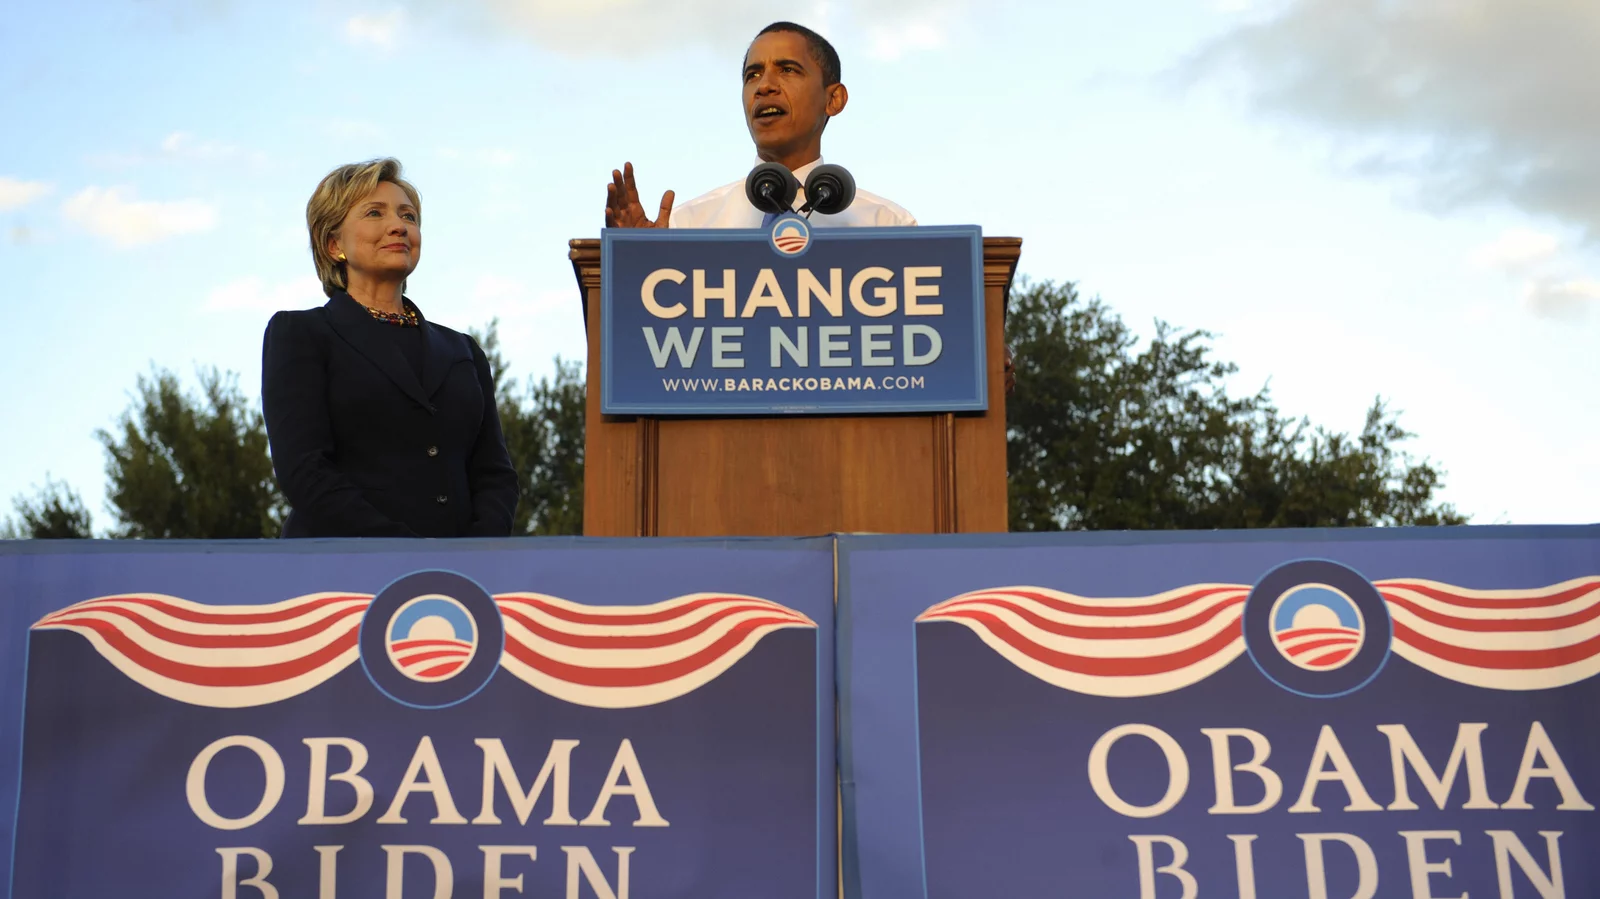

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display

# Program koji će detektovati lica je u sledećem primeru
pil_im = Image.open('known/obama2.jpg')
display(pil_im)

## NumPy

NumPy je biblioteka za programski jezik Python, koja dodaje podršku za velike, višedimenzionalne nizove i matrice, zajedno sa velikom kolekcijom matematičkih funkcija na visokom nivou za rad na tim nizovima. Rodonačelnika NumPy-a, Numeric-a, prvobitno je kreirao Jim Hugunin uz doprinos nekoliko drugih programera. 2005. Travis Oliphant je stvorio NumPy ugrađivanjem karakteristika konkurentskog Numarrai-a u Numeric, sa opsežnim modifikacijama. NumPy je softver otvorenog koda i ima mnogo saradnika.

## Pillow

PIL je Python Imaging biblioteka Fredrika Lunda i saradnika.
Pollow za preduzeća dostupan je putem pretplate na Tidelift.

The Python Imaging Library dodaje mogućnosti obrade slika vašem Python interpreteru.

Ova biblioteka pruža opsežnu podršku za format datoteke, efikasnu internu reprezentaciju i prilično moćne mogućnosti obrade slika.

Osnovna biblioteka slika dizajnirana je za brzi pristup podacima uskladištenim u nekoliko osnovnih formata piksela. Trebalo bi da pruži solidnu osnovu za opšti alat za obradu slika.

In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# Ovo je primer prepoznavanja lica na jednoj slici 
# i iscrtavanje crvenog pravougaonika oko svake identifikovane osobe (lica)

# Učitavanje slike i učenje kako da prepozna osobu 
obama_image = face_recognition.load_image_file('known/obama.jpg')
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Ucitavanje slike druge osobe i učenje kako da je prepozna
biden_image = face_recognition.load_image_file('known/biden.jpg')
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Pravljenje niza poznatih lica i njihovih imena
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 2 images.


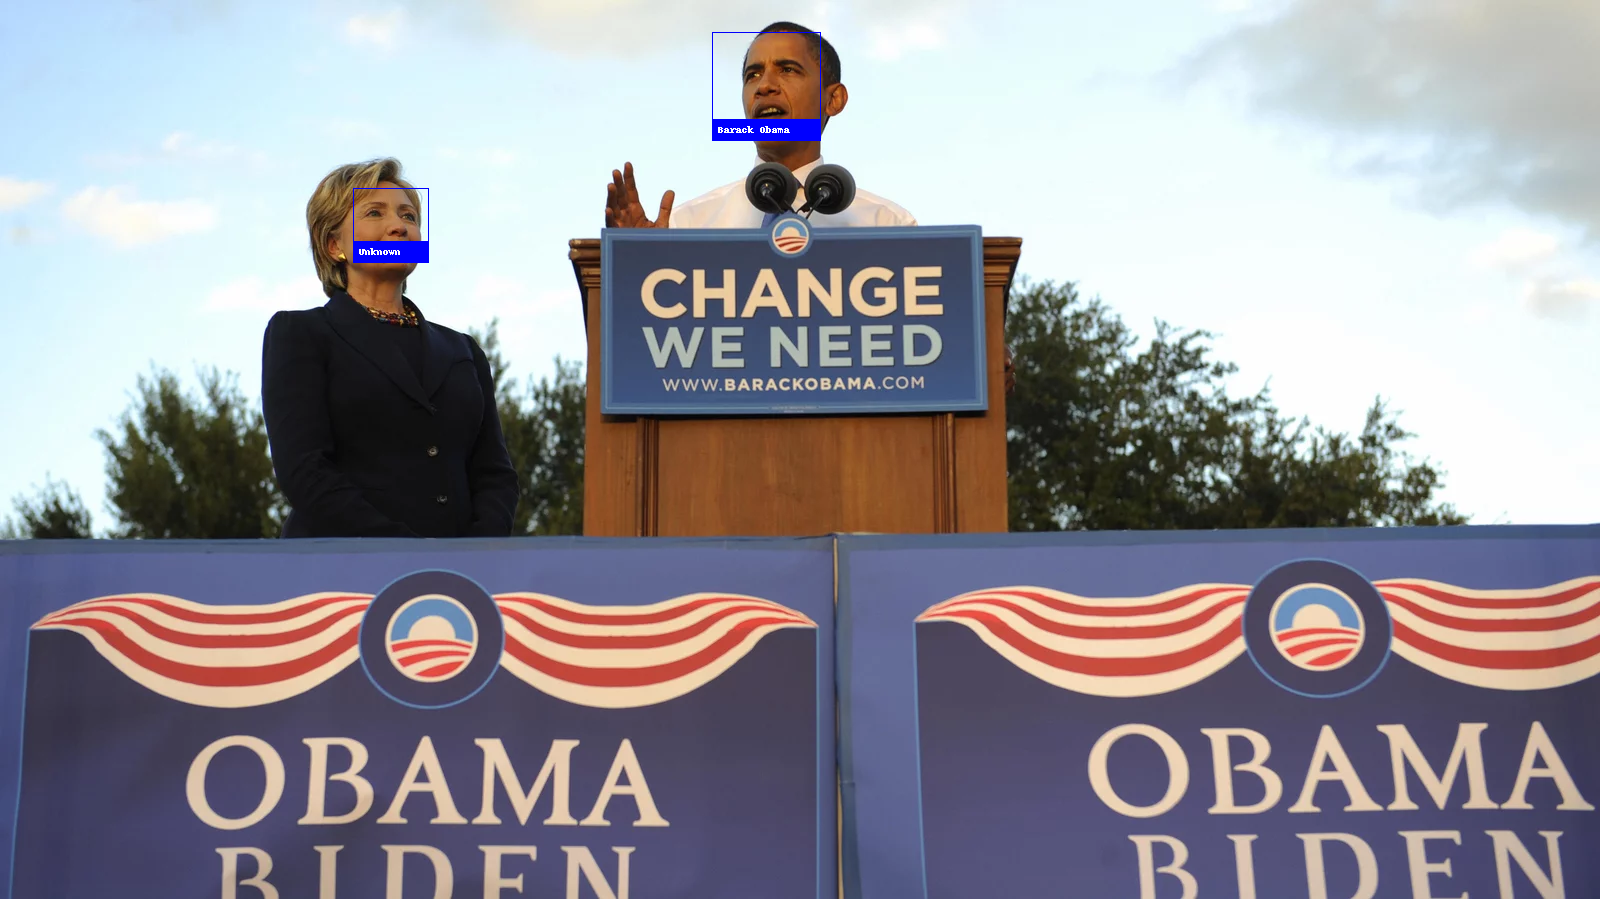

In [ ]:
# Učitavanje slike sa nepoznatim licem
unknown_image = face_recognition.load_image_file('known/obama2.jpg')

# Prolanaženje svih lica na nepoznatoj slici
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Slika se konvertuje u PIL-format da bi se uspešno iscrtavao pravougaonik na njoj uz pomoć Pillow biblioteke
pil_image = Image.fromarray(unknown_image)

# Pravljenje instance za uspešno crtanje
draw = ImageDraw.Draw(pil_image)

# Izlistavanje svakog lica na nepoznatoj slici
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # Proveravanje da li se lice podudara sa poznatim licem
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Ili umseto toga se koristi poznato lice sa najmanjom distancom od novog lica
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Iscrtavanje pravougaonika oko detektovanog lica
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Ispisiivanje imena ispod detektovanog lica
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Uklanjanje biblioteke crteža iz memorije
del draw

# Prikazivanje rezultujuće slike
display(pil_image)

In [ ]:
import cv2
cv2.__version__

'4.1.2'

In [ ]:
!wget https://raw.githubusercontent.com/ageitgey/face_recognition/master/examples/biden.jpg -O known/biden2.jpg


--2021-08-30 00:46:51--  https://raw.githubusercontent.com/ageitgey/face_recognition/master/examples/biden.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353723 (345K) [image/jpeg]
Saving to: ‘known/biden2.jpg’

known/biden2.jpg    100%[===================>] 345.43K  --.-KB/s    in 0.03s   

2021-08-30 00:46:51 (9.83 MB/s) - ‘known/biden2.jpg’ saved [353723/353723]



## Deep Learning Neural Networks

U poslednjih nekoliko godina veštačka inteligencija (AI) bila je predmet intenzivnih medija. Mašinsko učenje, duboko učenje i umetnička inteligencija često se pojavljuju u bezbrojnim člancima
izvan tehnološki orijentisanih publikacija. Obećana nam je inteligentna budućnost chatbotovi, samovozeći automobili i virtuelni asistenti - budućnost koja je ponekad obojena u sumorno svetlo i druga vremena kao utopijska, gde će ljudskih poslova biti malo i najviše
ekonomskom aktivnošću će se baviti roboti ili agenti AI. Za budućnost ili sadašnjost praktičar mašinskog učenja, važno je da bude u stanju da prepozna signal u buci, tako da možete prepoznati razvoj koji se menja u svetu od preteranog saopštenja za javnost. Naša budućnost je u pitanju i to je budućnost u kojoj ste aktivni
uloga.

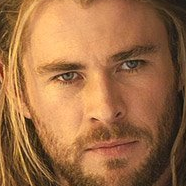

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display

# Program koji će detektovati lica je u sledećem primeru
pil_im = Image.open('cropped_images/chris_hemsworth/chris_hemsworth17.png')
display(pil_im)

In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# Ovo je primer prepoznavanja lica na jednoj slici 
# i iscrtavanje crvenog pravougaonika oko svake identifikovane osobe (lica)

# Učitavanje slike i učenje kako da prepozna osobu 
scarlett_image = face_recognition.load_image_file('cropped_images/scarlett_johansson/scarlett_johansson3.png')
scarlett_face_encoding = face_recognition.face_encodings(scarlett_image)[0]

# Ucitavanje slike druge osobe i učenje kako da je prepozna
chris_image = face_recognition.load_image_file('cropped_images/chris_evans/chris_evans1.png')
chris_face_encoding = face_recognition.face_encodings(chris_image)[0]

# Ucitavanje slike druge osobe i učenje kako da je prepozna
hemsworth_image = face_recognition.load_image_file('cropped_images/chris_hemsworth/chris_hemsworth23.png')
hemsworth_face_encoding = face_recognition.face_encodings(hemsworth_image)[0]


# Pravljenje niza poznatih lica i njihovih imena
known_face_encodings = [
    scarlett_face_encoding,
    chris_face_encoding,
    hemsworth_face_encoding

]
known_face_names = [
    "Scarlett",
    "Chris Evans",
    "Chris Hemsworth"
]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 3 images.


In [ ]:
!wget https://www.altonivel.com.mx/wp-content/uploads/2019/05/avengers.jpg -O known/avengers.jpg

--2021-08-30 00:47:07--  https://www.altonivel.com.mx/wp-content/uploads/2019/05/avengers.jpg
Resolving www.altonivel.com.mx (www.altonivel.com.mx)... 172.67.145.84, 104.21.71.127, 2606:4700:3035::ac43:9154, ...
Connecting to www.altonivel.com.mx (www.altonivel.com.mx)|172.67.145.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237273 (232K) [image/jpeg]
Saving to: ‘known/avengers.jpg’

known/avengers.jpg  100%[===================>] 231.71K  --.-KB/s    in 0.03s   

2021-08-30 00:47:07 (6.97 MB/s) - ‘known/avengers.jpg’ saved [237273/237273]



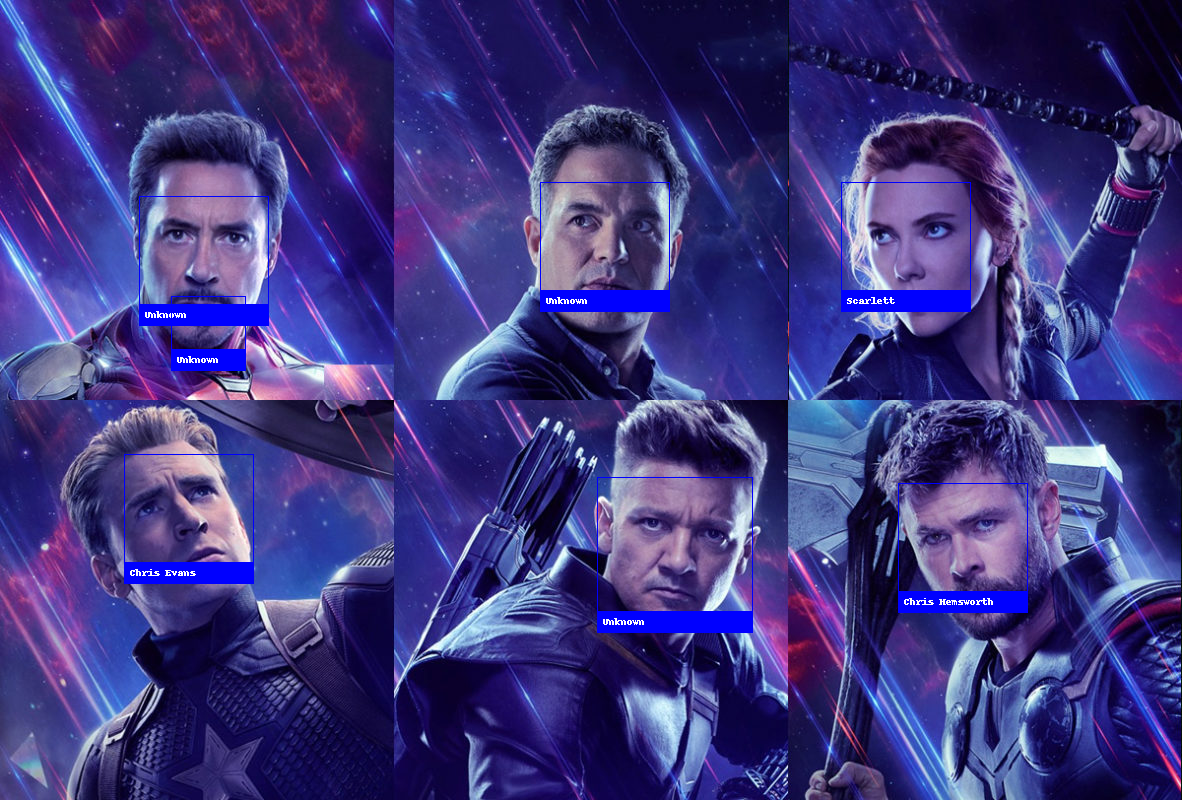

In [ ]:
# Učitavanje slike sa nepoznatim licem
unknown_image = face_recognition.load_image_file('known/avengers.jpg')

# Prolanaženje svih lica na nepoznatoj slici
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Slika se konvertuje u PIL-format da bi se uspešno iscrtavao pravougaonik na njoj uz pomoć Pillow biblioteke
pil_image = Image.fromarray(unknown_image)

# Pravljenje instance za uspešno crtanje
draw = ImageDraw.Draw(pil_image)

# Izlistavanje svakog lica na nepoznatoj slici
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # Proveravanje da li se lice podudara sa poznatim licem
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Ili umseto toga se koristi poznato lice sa najmanjom distancom od novog lica
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Iscrtavanje pravougaonika oko detektovanog lica
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Ispisiivanje imena ispod detektovanog lica
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Uklanjanje biblioteke crteža iz memorije
del draw

# Prikazivanje rezultujuće slike
display(pil_image)

## **Face detection using MTCNN**

MTCNN ili Multi-Task Cascaded Convolutional Neural Networks je neuronska mreža koja otkriva lica i orijentire na slikama. Objavili su ga 2016. godine Zhang et al.

MTCNN je jedan od najpopularnijih i najtačnijih alata za otkrivanje lica danas. 

Ovaj model ima tri konvolucione neuronske mreže povezane u kaskadi (P-Net, R-Net i O-Net) i sposoban je da nadmaši mnoge referentne vrednosti za otkrivanje lica, zadržavajući performanse u realnom vremenu

Prvo se veličina slike menja više puta kako bi se otkrila lica različitih veličina. Tada **P-Net** (Proposal) skenira slike izvršavajući prvo otkrivanje. Ima nizak prag  otkrivanja i zato otkriva mnoge lažne pozitivne rezultate, čak i nakon NMS (Non-Makimum Suppression), ali to radi namerno.

Predloženi regioni (koji sadrže mnogo lažnih pozitivnih rezultata) su ulazni podaci za drugu mrežu, **R-Net** (Refine), koja, kao što i samo ime govori, filtrira detekcije (takođe sa NMS-om) da bi dobila prilično precizne granične kutije.

Završna faza, **O-Net** (Output) izvodi završno usavršavanje graničnih okvira. Na ovaj način se ne otkrivaju samo lica, već su ograničavajući okviri vrlo ispravni i precizni.

Opcionalna karakteristika MTCNN-a je otkrivanje orijentira na licu, tj. Očiju, nosa i uglova usta.

MTCNN je vrlo precizan i robustan. Pravilno otkriva lica čak i sa različitim veličinama, osvetljenjem i jakim rotacijama. Nešto je sporiji od Viola-Jones detektora. Takođe koristi informacije u boji, jer CNN-ovi dobijaju RGB slike kao ulaz.

In [ ]:
!pip install mtcnn


     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [ ]:
#Učitavanje potrebnih biblioteka
from mtcnn.mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

#Učitavanje fotografije koju ću obrađivati
image = cv2.imread('cropped_images/scarlett_johansson/scarlett_johansson1.png')

In [ ]:
# Učitavanje detektora i detektovanje lica uz njegovu pomoć
# Kao izlaz dobijam koordinate okvira lica, levog i desnog oka, nosa i leve i desne ivice usta.

detector = MTCNN()

faces = detector.detect_faces(image)

for face in faces:
  print(face)

{'box': [52, 0, 700, 872], 'confidence': 0.9999958276748657, 'keypoints': {'left_eye': (311, 290), 'right_eye': (619, 353), 'nose': (472, 470), 'mouth_left': (256, 597), 'mouth_right': (553, 653)}}


In [ ]:
# Kreiranje samog okvira koji će biti prikazan na slici kao pravougaonih i tački koje će označavati oči nos i ivice usta

def create_bbox(image):
  faces = detector.detect_faces(image)
  bounding_box = faces[0]['box']
  keypoints = faces[0]['keypoints']

  cv2.rectangle(image,
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                (0, 155, 255),
                2)
  
  cv2.circle(image,(keypoints['left_eye']), 2, (0, 155, 255), 2)
  cv2.circle(image,(keypoints['right_eye']), 2, (0, 155, 255), 2)
  cv2.circle(image,(keypoints['nose']), 2, (0, 155, 255), 2)
  cv2.circle(image,(keypoints['mouth_left']), 2, (0, 155, 255), 2)
  cv2.circle(image,(keypoints['mouth_right']), 2, (0, 155, 255), 2)

  return image 

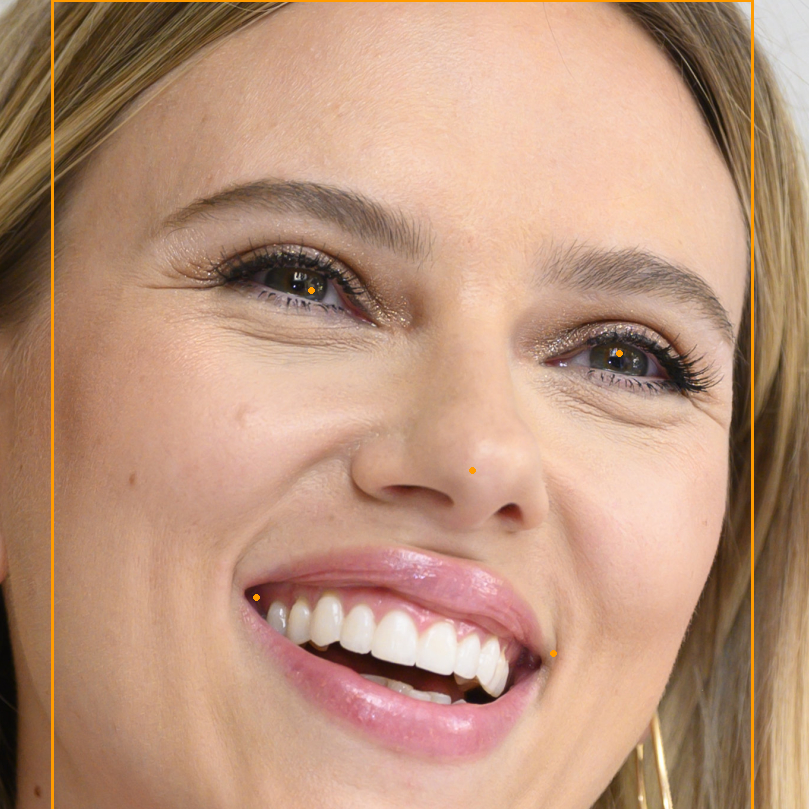

In [ ]:
# Hvatanje slike iz funkcija za ivičenje i njen prikaz
marked_image = create_bbox(image)
cv2_imshow(marked_image)

# **Zaključak**

Rad na projektu doneo je još jedno dodatno iskustvo u oblasti Deep Learning-a. Daljim radom moguće je usavršavanje mreže, dodatni trening kao i učenje da bi se povećala sigurnost detekcije lica mreže. Tema je dosta interesantna i dosta je primenljiva u sadašnjosti. `MTCNN` je jako jednostavan i interesantan za korišćenje, ali i veoma rasprostranjen u današnje vreme. Dok je `face_recognition` biblioteka meni iskreno bila vrlo interesantna za korišćenje međutim nisam sigurna koliko je u realnosti ovaj način njene primene rasprostranjen jer nam je potreban konačan skup poznatih lica kako bi bili u stanju sva i da prepoznamo (naravno u slučaju da nam je to cilj).